In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('../sentiment_analysis/reviews_with_sentiment.csv')

In [15]:
sentiment_map = {'NEGATIVE': -1, 'Neutral': 0, 'POSITIVE': 1}
df['sentiment'] = df['sentiment'].map(sentiment_map)

In [16]:
df['sentiment_score'] = pd.to_numeric(df['sentiment'], errors='coerce')


In [17]:
agg_sentiment = df.groupby(['bank', 'rating'])['sentiment_score'].mean().reset_index()
print(agg_sentiment)


         bank  rating  sentiment_score
0   abyssinia       1        -0.865169
1   abyssinia       2        -0.733333
2   abyssinia       3        -0.235294
3   abyssinia       4        -0.111111
4   abyssinia       5         0.504065
5         cbe       1        -0.611111
6         cbe       2        -0.700000
7         cbe       3        -0.230769
8         cbe       4         0.191489
9         cbe       5         0.576119
10     dashen       1        -0.794872
11     dashen       2        -0.684211
12     dashen       3        -0.304348
13     dashen       4         0.241379
14     dashen       5         0.743590


In [18]:
print(df['sentiment'].value_counts())


sentiment
 1    886
-1    614
Name: count, dtype: int64


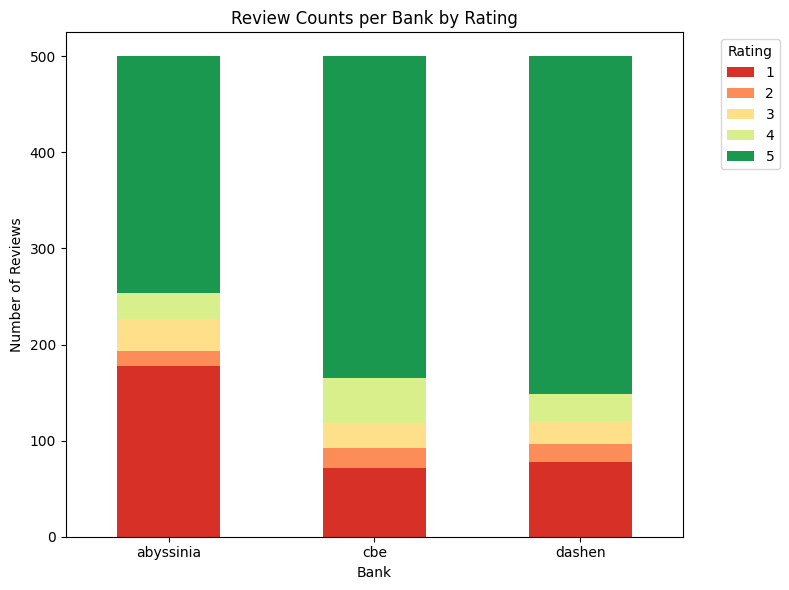

In [23]:
import matplotlib.pyplot as plt
rating_counts = df.groupby(['bank', 'rating']).size().unstack(fill_value=0)
rating_counts.plot(kind='bar', stacked=True, figsize=(8,6), color=['#d73027','#fc8d59','#fee08b','#d9ef8b','#1a9850'])
plt.title("Review Counts per Bank by Rating")
plt.ylabel("Number of Reviews")
plt.xlabel("Bank")
plt.xticks(rotation=0)
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()
plt.show()


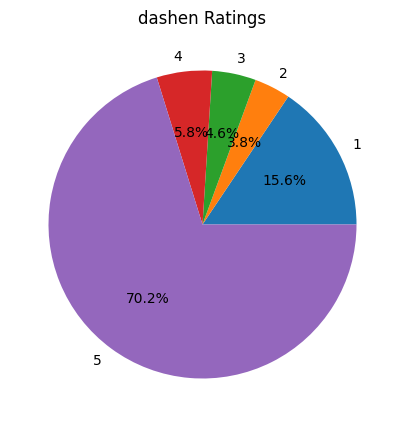

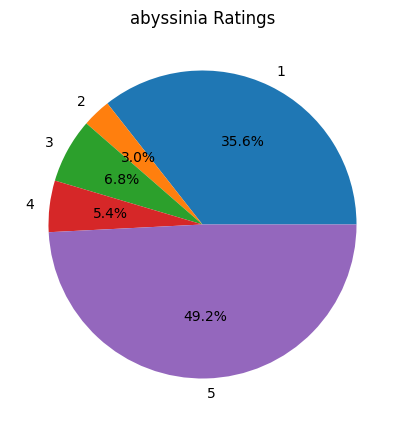

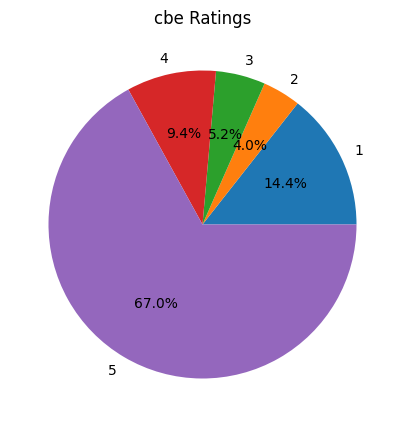

In [24]:
for bank in df['bank'].unique():
    df_bank = df[df['bank']==bank]
    df_bank['rating'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5), title=f"{bank} Ratings")
    plt.ylabel('')
    plt.show()


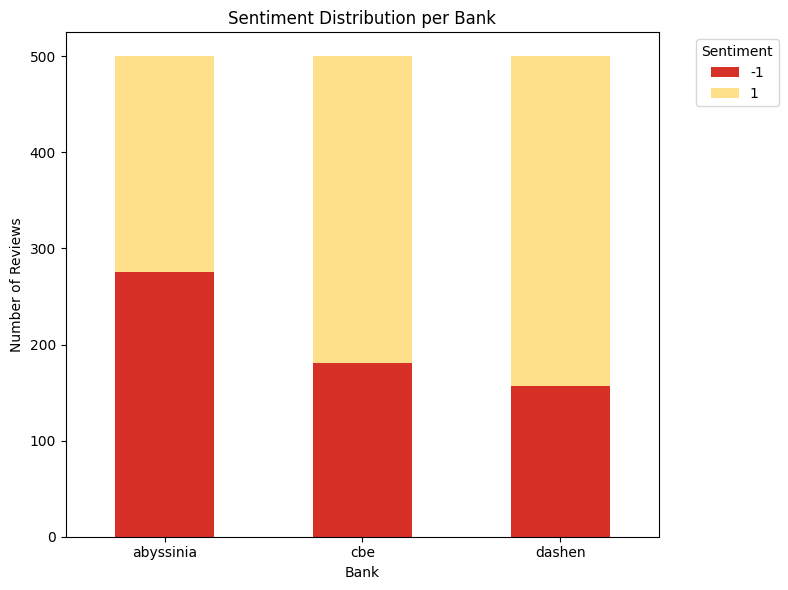

In [25]:
import matplotlib.pyplot as plt

# Count of sentiment labels per bank
sentiment_counts = df.groupby(['bank', 'sentiment']).size().unstack(fill_value=0)

# Plot stacked bar chart
sentiment_counts.plot(kind='bar', stacked=True, figsize=(8,6), color=['#d73027','#fee08b','#1a9850'])
plt.title("Sentiment Distribution per Bank")
plt.ylabel("Number of Reviews")
plt.xlabel("Bank")
plt.xticks(rotation=0)
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
